In [265]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [261]:
import dynascale as ds
from dynascale.baselines.lr import NaiveLinearRegression
from dynascale.baselines.tommylr import TommyLinearRegression
from dynascale.baselines.koopman import Koopman



import matplotlib.pyplot as plt
import pandas as pd

In [262]:
task = ds.Task(
    N=[10],
    L=[2, 3, 4],
    E=[3],
    T=[5],
    factory_cls=ds.LDSChallenge,
    supepochs=2,
    test_size=1,
    trials=5,
)

In [263]:
scores1 = task.evaluate(NaiveLinearRegression)

In [258]:
scores2 = task.evaluate(Koopman)

Trial 0/5: n=10, latent_dim=2, embed_dim=3, timesteps=5:   0%|          | 0/15 [00:00<?, ?it/s]

1/1 [==============================] - 0s 181ms/step - loss: 673967.8750 - reconstruction_loss: 991.7719 - state_prediction_loss: 195931.5312 - linear_dynamics_loss: 671997.3750 - infinity_norm: 87.5732


Trial 0/5: n=10, latent_dim=3, embed_dim=3, timesteps=5:   7%|▋         | 1/15 [00:02<00:41,  2.99s/it]

1/1 [==============================] - 0s 190ms/step - loss: 30074455719936.0000 - reconstruction_loss: 1160.3766 - state_prediction_loss: 147605845704704.0000 - linear_dynamics_loss: 28598396256256.0000 - infinity_norm: 2195.9846


Trial 1/5: n=10, latent_dim=2, embed_dim=3, timesteps=5:  13%|█▎        | 2/15 [00:05<00:38,  2.96s/it]

1/1 [==============================] - 0s 171ms/step - loss: 15442.9805 - reconstruction_loss: 2101.2046 - state_prediction_loss: 173231.2500 - linear_dynamics_loss: 13686.8223 - infinity_norm: 246.7214


Trial 1/5: n=10, latent_dim=3, embed_dim=3, timesteps=5:  20%|██        | 3/15 [00:08<00:34,  2.84s/it]

1/1 [==============================] - 0s 168ms/step - loss: 19368218624.0000 - reconstruction_loss: 2261.9360 - state_prediction_loss: 266322739200.0000 - linear_dynamics_loss: 16704990208.0000 - infinity_norm: 1001.2433


Trial 2/5: n=10, latent_dim=2, embed_dim=3, timesteps=5:  27%|██▋       | 4/15 [00:11<00:30,  2.75s/it]

1/1 [==============================] - 0s 171ms/step - loss: 18676800.0000 - reconstruction_loss: 6064.2188 - state_prediction_loss: 1879175.2500 - linear_dynamics_loss: 18657946.0000 - infinity_norm: 280.4667


Trial 2/5: n=10, latent_dim=3, embed_dim=3, timesteps=5:  33%|███▎      | 5/15 [00:13<00:27,  2.70s/it]

1/1 [==============================] - 0s 310ms/step - loss: 48907206656.0000 - reconstruction_loss: 1536.0852 - state_prediction_loss: 397528072192.0000 - linear_dynamics_loss: 44931928064.0000 - infinity_norm: 959.2885


Trial 3/5: n=10, latent_dim=2, embed_dim=3, timesteps=5:  40%|████      | 6/15 [00:17<00:26,  3.00s/it]

1/1 [==============================] - 0s 180ms/step - loss: 1779360000.0000 - reconstruction_loss: 2545.1646 - state_prediction_loss: 20058906624.0000 - linear_dynamics_loss: 1578770944.0000 - infinity_norm: 670.4999


Trial 3/5: n=10, latent_dim=3, embed_dim=3, timesteps=5:  47%|████▋     | 7/15 [00:20<00:24,  3.03s/it]

1/1 [==============================] - 0s 201ms/step - loss: 126792.0000 - reconstruction_loss: 2549.9373 - state_prediction_loss: 148349.2188 - linear_dynamics_loss: 125280.4531 - infinity_norm: 215.6572


Trial 4/5: n=10, latent_dim=2, embed_dim=3, timesteps=5:  53%|█████▎    | 8/15 [00:23<00:20,  2.97s/it]

1/1 [==============================] - 0s 211ms/step - loss: 37038616576.0000 - reconstruction_loss: 2976.1038 - state_prediction_loss: 836771708928.0000 - linear_dynamics_loss: 28670898176.0000 - infinity_norm: 606.2791


Trial 4/5: n=10, latent_dim=3, embed_dim=3, timesteps=5:  60%|██████    | 9/15 [00:26<00:17,  2.92s/it]

1/1 [==============================] - 0s 180ms/step - loss: 79194750976.0000 - reconstruction_loss: 641.2521 - state_prediction_loss: 4191209914368.0000 - linear_dynamics_loss: 37282648064.0000 - infinity_norm: 931.8004


In [ ]:
scores3 = task.evaluate(TommyLinearRegression)

<Figure size 640x480 with 0 Axes>

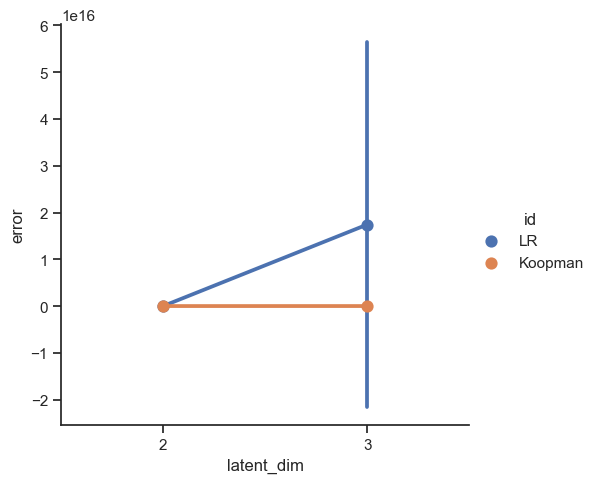

In [266]:
ds.plotting.plot_metric([scores1, scores2], labels=["LR", "Koopman"], x_col="latent_dim", y_col="error")

        id  latent_dim   n         error
0  Koopman           2  10  3.423720e+10
1  Koopman           3  10  3.235509e+12
2       LR           2  10  6.851408e+09
3       LR           3  10  1.742279e+16


<Figure size 640x480 with 0 Axes>

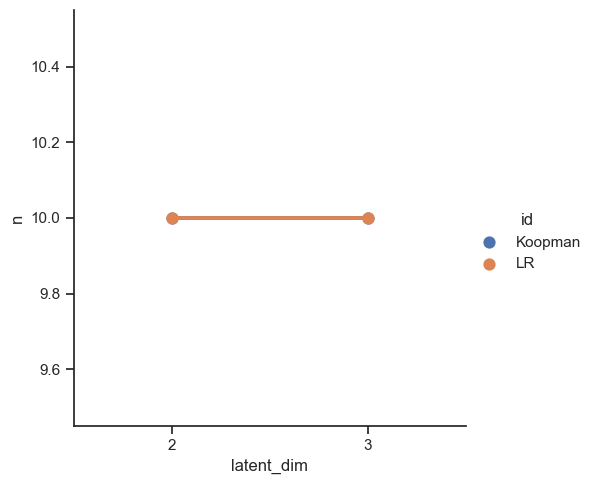

In [267]:
ds.plotting.plot_target_error([scores1, scores2], labels=["LR", "Koopman"], x_col="latent_dim", y_col="n", target_error=1.968312e+24)

    n  latent_dim  embed_dim  timesteps         error  id    label
0  10           2          3          5  2.778133e+07   2       LR
1  10           3          3          5  1.208213e+01   2       LR
2  10           2          3          5  9.594234e+07   2       LR
3  10           3          3          5  2.515851e+11   2       LR
4  10           2          3          5  5.781213e+09   2       LR
5  10           3          3          5  4.449478e+04   2       LR
0  10           2          3          5  1.642646e+04   5  Koopman
1  10           3          3          5  6.542932e+09   5  Koopman
2  10           2          3          5  3.003988e+03   5  Koopman
3  10           3          3          5  6.841369e+06   5  Koopman
4  10           2          3          5  3.845482e+04   5  Koopman
5  10           3          3          5  1.485724e+05   5  Koopman


<Figure size 640x480 with 0 Axes>

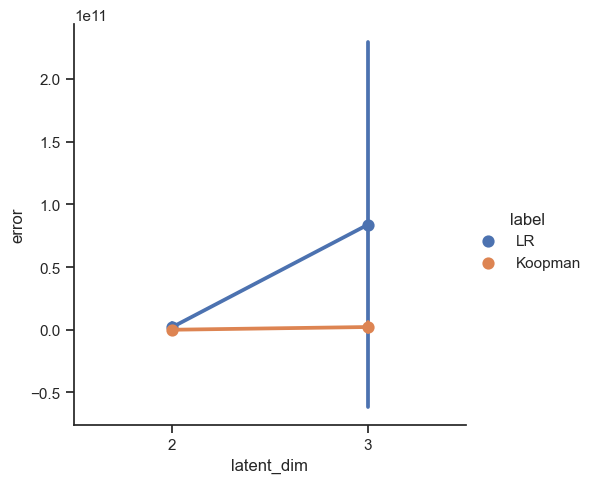

In [220]:
scores1["label"] = "LR"
scores2["label"] = "Koopman"
ds.plotting.plot_metric([scores1, scores2], "latent_dim", "error", hue="label")